# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
train = pd.read_csv('./titanicData/train.csv')
test = pd.read_csv('./titanicData/test.csv')
gender_submission = pd.read_csv('./titanicData/gender_submission.csv')

print(train)
print(test)
print(gender_submission)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
train.info()
test.info()

# train -> Age, Cabin, Embarked null 존재
# test -> Age, Fare, Cabin, Embarked null 존재
# Sex의 경우 카테고리형 데이터이기 때문에 수치형으로 변환시켜야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
## 'Sex' 형변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# train_sex_result = le.fit_transform(train['Sex'])
train['Sex_numeric'] = le.fit_transform(train['Sex'])
# test_sex_result = le.fit_transform(test['Sex'])
test['Sex_numeric'] = le.fit_transform(test['Sex'])

In [5]:
print(train['Sex_numeric'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_numeric, Length: 891, dtype: int64


In [6]:
print(train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
# null값을 가장 많은 S로 치환해야함
train['Embarked'].fillna('S', inplace=True)

# train_embarked_result = le.fit_transform(train['Embarked'])
train['Embarked_numeric'] = le.fit_transform(train['Embarked'])
# test_embarked_result = le.fit_transform(test['Embarked'])
test['Embarked_numeric'] = le.fit_transform(test['Embarked'])
# embarked 수치형으로 변환
print(train['Embarked_numeric'])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked_numeric, Length: 891, dtype: int64


In [8]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
# 나이의 null값은 중앙값으로 치환

In [9]:
train.loc[train['Age'] <= 10, 'Age_partition'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] <= 16), 'Age_partition'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] <= 20), 'Age_partition'] = 2
train.loc[(train['Age'] > 20) & (train['Age'] <= 26), 'Age_partition'] = 3
train.loc[(train['Age'] > 26) & (train['Age'] <= 30), 'Age_partition'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] <= 36), 'Age_partition'] = 5
train.loc[(train['Age'] > 36) & (train['Age'] <= 40), 'Age_partition'] = 6
train.loc[(train['Age'] > 40) & (train['Age'] <= 46), 'Age_partition'] = 7
train.loc[(train['Age'] > 46) & (train['Age'] <= 50), 'Age_partition'] = 8
train.loc[(train['Age'] > 50) & (train['Age'] <= 56), 'Age_partition'] = 9
train.loc[(train['Age'] > 56) & (train['Age'] <= 60), 'Age_partition'] = 10
train.loc[train['Age'] > 60, 'Age_partition'] = 11

print(train['Age_partition'])

0      3.0
1      6.0
2      3.0
3      5.0
4      5.0
      ... 
886    4.0
887    2.0
888    4.0
889    3.0
890    5.0
Name: Age_partition, Length: 891, dtype: float64


In [10]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               418 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              418 non-null    float64
 9   Cabin             91 non-null     object 
 10  Embarked          418 non-null    object 
 11  Sex_numeric       418 non-null    int64  
 12  Embarked_numeric  418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [11]:
mapping_num = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

train['Cabin_site'] = train['Cabin'].str[:1]
# 맨 앞에가 알파벳이기 때문에 나머지를 빼고 Cabin_site에 저장
print(train['Cabin_site'].value_counts())
train['Cabin_site'] = train['Cabin_site'].map(mapping_num)
# 맵핑 넘버로 치환
print(train['Cabin_site'].value_counts())

Cabin_site
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64
Cabin_site
2.0    59
1.0    47
3.0    33
4.0    32
0.0    15
5.0    13
6.0     4
7.0     1
Name: count, dtype: int64


In [12]:
train['Cabin_site'] = train.groupby('Pclass')['Cabin_site'].transform('median')
print(train['Cabin_site'].value_counts())

Cabin_site
5.0    491
2.0    216
4.5    184
Name: count, dtype: int64


In [13]:
test['Cabin_site'] = test['Cabin'].str[:1]
# 맨 앞에가 알파벳이기 때문에 나머지를 빼고 Cabin_site에 저장
print(test['Cabin_site'].value_counts())
test['Cabin_site'] = test['Cabin_site'].map(mapping_num)
# 맵핑 넘버로 치환

Cabin_site
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64


In [14]:
test['Cabin_site'] = test.groupby('Pclass')['Cabin_site'].transform('median')
print(test['Cabin_site'].value_counts())

Cabin_site
5.0    311
2.0    107
Name: count, dtype: int64


In [15]:
# Fare를 등급으로 나누기 위해 10등분
train['Fare_binning'] = pd.qcut(train['Fare'], 10)
test['Fare_binning'] = pd.qcut(test['Fare'], 10)

print(train['Fare_binning'].value_counts())
print(test['Fare_binning'].value_counts())

Fare_binning
(7.854, 8.05]        106
(-0.001, 7.55]        92
(27.0, 39.688]        91
(21.679, 27.0]        89
(39.688, 77.958]      89
(14.454, 21.679]      88
(7.55, 7.854]         87
(77.958, 512.329]     87
(10.5, 14.454]        84
(8.05, 10.5]          78
Name: count, dtype: int64
Fare_binning
(7.796, 8.05]       51
(11.342, 14.454]    44
(7.644, 7.796]      43
(21.196, 26.55]     43
(46.34, 79.2]       43
(-0.001, 7.644]     42
(79.2, 512.329]     41
(14.454, 21.196]    40
(26.55, 46.34]      40
(8.05, 11.342]      31
Name: count, dtype: int64


In [16]:
train['Fare_grade'] = train['Fare_binning'].astype('category').cat.codes
test['Fare_grade'] = test['Fare_binning'].astype('category').cat.codes

print(train['Fare_grade'].value_counts())
print(test['Fare_grade'].value_counts())

Fare_grade
2    106
0     92
7     91
8     89
6     89
5     88
1     87
9     87
4     84
3     78
Name: count, dtype: int64
Fare_grade
2    51
4    44
6    43
8    43
1    43
0    42
9    41
7    40
5    40
3    31
Name: count, dtype: int64


In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric,Age_partition,Cabin_site,Fare_binning,Fare_grade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,3.0,5.0,"(-0.001, 7.55]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,6.0,2.0,"(39.688, 77.958]",8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,3.0,5.0,"(7.854, 8.05]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,5.0,2.0,"(39.688, 77.958]",8
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,5.0,5.0,"(7.854, 8.05]",2


In [18]:
train_selection = train[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric', 'Cabin_site', 'Fare_grade', 'Survived']].to_numpy()
df = pd.DataFrame()

train_selection_df = pd.DataFrame(train_selection)
train_selection_df


,0,1,2,3,4,5,6,7,8,9
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,5.0,0.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0,8.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,5.0,2.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0,8.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,2.0,4.5,4.0,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,2.0,7.0,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,2.0,5.0,6.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,2.0,7.0,1.0


In [19]:
train_selection_df.columns = ['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric', 'Cabin_site', 'Fare_grade', 'Survived']
train_selection_df

,Pclass,Sex_numeric,Age,SibSp,Parch,Fare,Embarked_numeric,Cabin_site,Fare_grade,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,5.0,0.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0,8.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,5.0,2.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0,8.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,2.0,4.5,4.0,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,2.0,7.0,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,2.0,5.0,6.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,2.0,7.0,1.0


# 검증

## 분산 분석(나이)
나이가 생존률에 영향을 주는가?

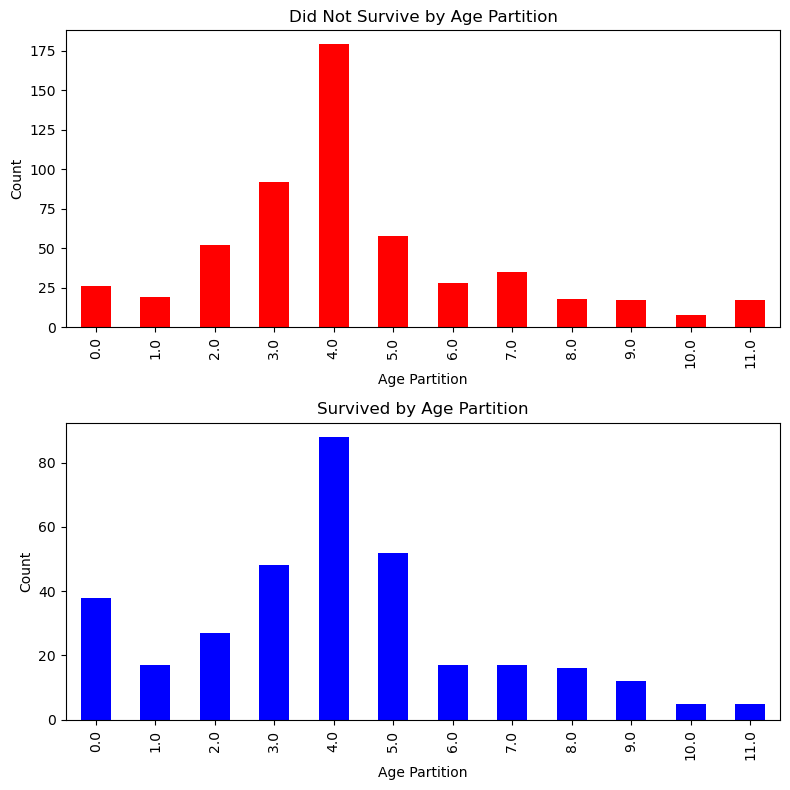

In [20]:

age_survival_counts = train.groupby('Age_partition')['Survived'].value_counts().unstack().fillna(0)

did_not_survive = age_survival_counts[0]
survived = age_survival_counts[1]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

did_not_survive.plot(kind='bar', ax=ax1, color='red', label='Did Not Survive')
ax1.set_xlabel('Age Partition')
ax1.set_ylabel('Count')
ax1.set_title('Did Not Survive by Age Partition')

survived.plot(kind='bar', ax=ax2, color='blue', label='Survived')
ax2.set_xlabel('Age Partition')
ax2.set_ylabel('Count')
ax2.set_title('Survived by Age Partition')

plt.tight_layout()
plt.show()


In [21]:
from scipy.stats import f_oneway
# 두개 이상의 집단을 분석하기 위해 t-test말고 분산 분석을 사용

# 데이터 분할
group1 = train[train['Age_partition'].isin([0])]['Survived']
group2 = train[train['Age_partition'].isin([1])]['Survived']
group3 = train[train['Age_partition'].isin([2])]['Survived']
group4 = train[train['Age_partition'].isin([3])]['Survived']
group5 = train[train['Age_partition'].isin([4])]['Survived']
group6 = train[train['Age_partition'].isin([5])]['Survived']
group7 = train[train['Age_partition'].isin([6])]['Survived']
group8 = train[train['Age_partition'].isin([7])]['Survived']
group9 = train[train['Age_partition'].isin([8])]['Survived']
group10 = train[train['Age_partition'].isin([9])]['Survived']
group11 = train[train['Age_partition'].isin([10])]['Survived']
group11 = train[train['Age_partition'].isin([11])]['Survived']

In [22]:
f_statistic, p_value = f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11)

if p_value < 0.05:
    print(f'p-value : {p_value: 4f}, 연령 그룹 간의 생존률에 통계적으로 유의미한 영향을 준다.')
else:
    print(f'p-value : {p_value: 4f}, 연령 그룹 간의 생존률에 통계적으로 유의미한 영향을 준다.')

p-value :  0.003652, 연령 그룹 간의 생존률에 통계적으로 유의미한 영향을 준다.


# 살아남은 사람들의 나이를 이용한 검증

In [23]:
age_partition_counts = train.groupby('Age_partition')['Survived'].count()
age_partition_survived = train.groupby('Age_partition')['Survived'].sum()

survival_ratio_by_age = age_partition_survived / age_partition_counts * 100
survived_ages = survival_ratio_by_age.values

train_sample = train.sample(100, replace=False)

age_partition_counts_s = train_sample.groupby('Age_partition')['Survived'].count()
age_partition_survived_s = train_sample.groupby('Age_partition')['Survived'].sum()

survival_ratio_by_age_s = age_partition_survived_s / age_partition_counts_s * 100
survived_ages_sample = survival_ratio_by_age_s.values

print(survived_ages)
print(survived_ages_sample)

[59.375      47.22222222 34.17721519 34.28571429 32.9588015  47.27272727
 37.77777778 32.69230769 47.05882353 41.37931034 38.46153846 22.72727273]
[57.14285714 25.         44.44444444 33.33333333 33.33333333 76.92307692
 40.          0.         50.         66.66666667  0.         50.        ]


In [24]:
ages_var = np.var(survived_ages)
ages_s_var = np.var(survived_ages_sample)

print(ages_var)
print(ages_s_var)

83.79934491081424
508.42617227754084


In [25]:
from scipy.stats import norm

def pmean_test(sample, population):
    ages_mean = np.mean(population)
    print(ages_mean)
    ages_s_mean = np.mean(sample)
    
    ages_std = np.std(population)
    ages_s_std = np.std(sample)
    
    ages_n = len(population)
    ages_s_n = len(sample)
    
    rv = norm()
    interval = rv.interval(0.95)
    
    z = (ages_s_mean-ages_mean)/np.sqrt(ages_std/ages_n)
    
    if interval[0] <= z <= interval[1] :
        print('귀무가설 채택')
    else :
        print('귀무가설 기각')
        
    if z < 0: 
        p_value = rv.cdf(z) * 2; #양측검정이므로 곱하기 2
    else:
        p_value = (1 - rv.cdf(z)) * 2
        
    print(p_value)
    
    if p_value > 0.05:
        print(f'p-value : {p_value: 4f}, 귀무가설 채택')
    else:
        print(f'p-value : {p_value: 4f}, 귀무가설 기각')

In [26]:
pmean_test(survived_ages_sample, survived_ages)

39.61572591681672
귀무가설 채택
0.8895897558118169
p-value :  0.889590, 귀무가설 채택


## t-test(성별)
성별이 생존률에 영향을 주는가?

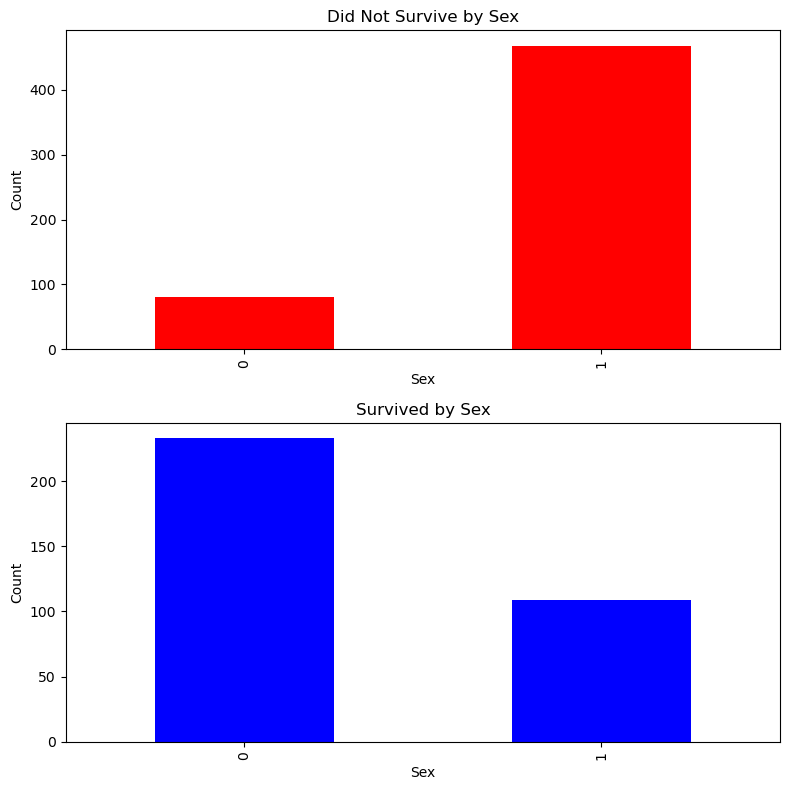

In [27]:
age_survival_counts = train.groupby('Sex_numeric')['Survived'].value_counts().unstack().fillna(0)

did_not_survive_sex = age_survival_counts[0]
survived_sex = age_survival_counts[1]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

did_not_survive_sex.plot(kind='bar', ax=ax1, color='red', label='Did Not Survive')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.set_title('Did Not Survive by Sex')

survived_sex.plot(kind='bar', ax=ax2, color='blue', label='Survived')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
ax2.set_title('Survived by Sex')

plt.tight_layout()
plt.show()


In [28]:
train['Sex_numeric'].value_counts()
# 1이 남자 0이 여자

male_survived = train[train['Sex_numeric'] == 1]
female_survived = train[train['Sex_numeric'] == 0]

print(male_survived)
print(female_survived)
male_survived['Survived'].describe()

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    22.0      1  

count    577.000000
mean       0.188908
std        0.391775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64

In [29]:
# 표본 평균
male_sr = male_survived['Survived'].mean()
female_sr = female_survived['Survived'].mean()

print(male_sr)
print(female_sr)

0.18890814558058924
0.7420382165605095


In [30]:
# 표본 개수
male_n = len(male_survived['Survived'])
female_n = len(female_survived['Survived'])

print(male_n)
print(female_n)

577
314
